In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
df = pd.read_csv('medilon.csv')
df.head()
df.shape

(2600, 501)

In [10]:
X = df.drop(['Class'], axis = 1)
y = df['Class']
type(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler= StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [12]:
from sklearn import tree

clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

C:\Users\aanup\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.65


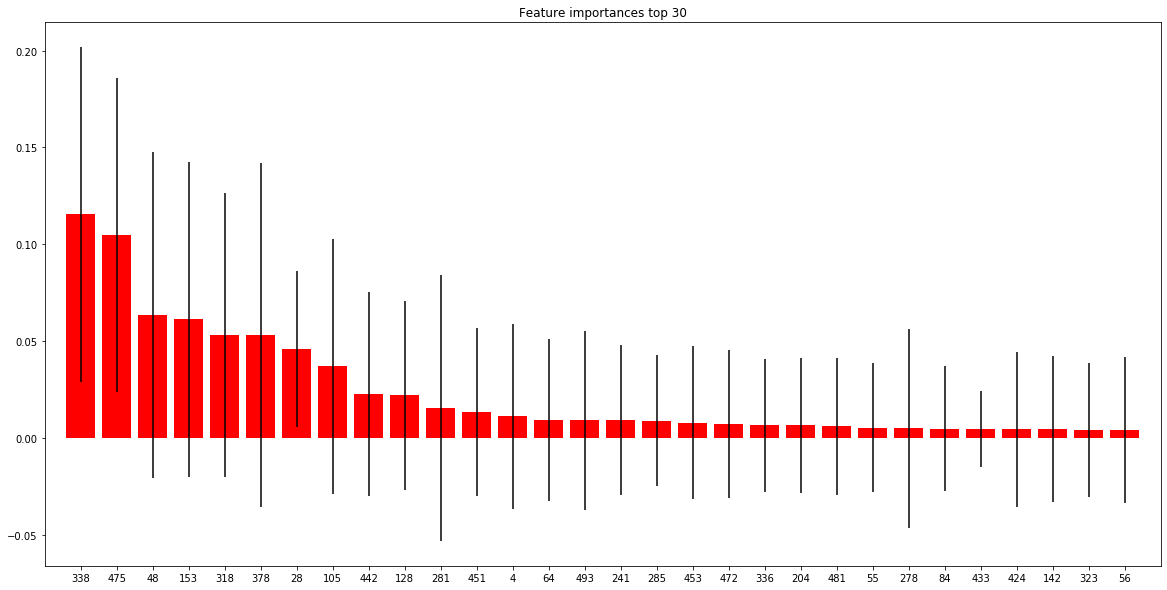

In [17]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
 
X.head()
# Create a random forest classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state = 0)
 
feat_labels = X.columns.values
# Fitting the classifier
gbc.fit(X, y)

# for feature in zip(feat_labels, rfc.feature_importances_):
#     print(feature) 

importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree[0].feature_importances_ for tree in gbc.estimators_],
                 axis=0)
zipped = zip(feat_labels, importances)
# zipped.sort(key = lambda t: t[1])

sorted_list = sorted(zipped, key=lambda x: x[1])
gini_values = sorted_list[::-1]

a = gini_values[:13]
# print(type(sorted_list))
# b = []
# for i in range(len(gini_values)):
#     if a[i][0]
top_n = 30
indices = indices[0:top_n]
plt.figure(figsize = (20,10))
plt.title("Feature importances top %d" % top_n)
plt.bar(range(top_n), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_n), indices)
plt.xlim([-1,top_n])
plt.show()

In [18]:
b = []
for i in range(len(a)):
    b.append(a[i][0])
b

[338, 475, 48, 153, 318, 378, 28, 105, 442, 128, 281, 451, 4]

In [19]:
Newdf = X.iloc[:, b[:5]]

In [20]:
Newdf

,338,475,48,153,318
0,1.312752,-1.150611,-1.062896,0.753090,-1.556575
1,0.276465,0.849855,0.324217,-0.995529,-0.359177
2,-0.728733,-0.434228,-0.592688,0.855348,0.446345
3,-1.288328,1.566239,1.029529,0.916703,-0.598657
4,0.079571,0.998539,-1.321510,-0.545592,-0.511573
...,...,...,...,...,...
2595,-0.676919,0.606555,-0.663219,0.926929,0.533428
2596,-0.252041,0.214572,-1.227468,0.640606,-1.142928
2597,-0.500750,0.376772,0.488790,-0.218365,1.709055
2598,-0.842725,0.471389,0.817935,0.671283,-0.968762


In [21]:
# Rf_train, Rf_test, y_train, y_test = train_test_split(Newdf, y, test_size=0.2, random_state=42)

In [33]:
'''list to hold accuracy, index and those index that need to be removed'''
accuracy = []
index = []
remove_index = []
# for i in range(15):
#     Newdf = X.iloc[:, b[:4+i]]
#     index.append(4+i)
#     Rf_train, Rf_test, y_train, y_test = train_test_split(Newdf, y, test_size=0.2, random_state=42)
#     rfc = DecisionTreeClassifier(random_state = 0)
#     rfc.fit(Rf_train, y_train)
#     rfc_predict = rfc.predict(Rf_test)
#     accuracy.append(accuracy_score(y_test, rfc_predict))
#     print("Accuracy: ", accuracy_score(y_test, rfc_predict))

'''We decided to choose first 4 columns which have highest gini index and compare wrt them
by adding other columns itteratively''' 


highest_accuracy = 0
for i in range(9):
    Newdf = X.iloc[:, b[:4+i]]
    index.append(b[4+i])
    
    Rf_train, Rf_test, y_train, y_test = train_test_split(Newdf, y, test_size=0.2, random_state=42)
    rfc = DecisionTreeClassifier(random_state = 0)
    rfc.fit(Rf_train, y_train)
    rfc_predict = rfc.predict(Rf_test)
    accuracy.append(accuracy_score(y_test, rfc_predict))
    if (accuracy[i] - accuracy[i-1]) < 0 or (accuracy[i] - highest_accuracy) < 0:
        if accuracy[i-1] - highest_accuracy >0:
            highest_accuracy = accuracy[i-1]
        remove_index.append(b[4+i])
#     print("Accuracy: ", accuracy_score(y_test, rfc_predict))
    
for indexed in zip(index, accuracy):
    print(indexed)
# print(index)  
# print(remove_index)

(318, 0.7557692307692307)
(378, 0.7903846153846154)
(28, 0.8134615384615385)
(105, 0.7903846153846154)
(442, 0.8096153846153846)
(128, 0.8307692307692308)
(281, 0.8307692307692308)
(451, 0.8076923076923077)
(4, 0.8288461538461539)


In [34]:
'''Uncomment the following two lines if you are running this code for first time
commented out for testing purpose'''
dtselected_index = [i for i in index  + remove_index if i not in index or i not in remove_index]
dtselected_index.append(remove_index[0])
'''These are the columns chosen out of the 20(which had highest gini index)
We removed those columns whose addition caused decrease in accuracy since
they add no value to the predictive capability of model rather decrease the accuracy'''

for i in range(4):
    dtselected_index.append(b[i])

dtselected_index

[318, 378, 28, 128, 281, 105, 338, 475, 48, 153]

In [35]:
'''This was for testing'''
iloceddf  = X.iloc[:, b[:4]]
iloceddf.loc[:, b[10]] = X.iloc[:, b[10]]

Rf_train, Rf_test, y_train, y_test = train_test_split(iloceddf, y, test_size=0.2, random_state=42)
rfc = DecisionTreeClassifier(random_state = 0)
rfc.fit(Rf_train, y_train)
rfc_predict = rfc.predict(Rf_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, rfc_predict))

Accuracy:  0.7423076923076923


C:\Users\aanup\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aanup\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [36]:
chosendf = X.iloc[:, dtselected_index]

Rf_train, Rf_test, y_train, y_test = train_test_split(chosendf, y, test_size=0.2, random_state=42)
rfc = DecisionTreeClassifier(random_state = 0)
rfc.fit(Rf_train, y_train)
rfc_predict = rfc.predict(Rf_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, rfc_predict))

Accuracy:  0.8096153846153846


In [37]:
'''Ok the accuracy has decreased---------Conclusion
so we can't remove any columns that contributed to the highest accuracy'''

"Ok the accuracy has decreased---------Conclusion\nso we can't remove any columns that contributed to the highest accuracy"

In [38]:
'''We procced to take all those columns i.e 10 columns'''

testdf = X.iloc[:, b[:10]]

Rf_train, Rf_test, y_train, y_test = train_test_split(testdf, y, test_size=0.2, random_state=42)
rfc = DecisionTreeClassifier(random_state = 0)
rfc.fit(Rf_train, y_train)
rfc_predict = rfc.predict(Rf_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, rfc_predict))

Accuracy:  0.8307692307692308


In [39]:
'''Lets try with Random Forest Classifier'''

'''list to hold accuracy, index and those index that need to be removed'''
accuracy = []
index = []
remove_index = []

'''We decided to choose first 4 columns which have highest gini index and compare wrt them
by adding other columns itteratively''' 


highest_accuracy = 0
for i in range(7):
    Newdf = X.iloc[:, b[:4+i]]
    index.append(b[4+i])
    
    Rf_train, Rf_test, y_train, y_test = train_test_split(Newdf, y, test_size=0.2, random_state=42)
    rfc = RandomForestClassifier(n_estimators=100, random_state = 0)
    rfc.fit(Rf_train, y_train)
    rfc_predict = rfc.predict(Rf_test)
    accuracy.append(accuracy_score(y_test, rfc_predict))
    if (accuracy[i] - accuracy[i-1]) < 0 or (accuracy[i] - highest_accuracy) <= 0:
        if accuracy[i-1] - highest_accuracy >0:
            highest_accuracy = accuracy[i-1]
            print(highest_accuracy)
        remove_index.append(b[4+i])
#     if (accuracy[i] - highest_accuracy) >0:
#         highest_accuracy = accuracy[i]

for indexed in zip(index, accuracy):
    print(indexed)

0.85
(318, 0.8173076923076923)
(378, 0.85)
(28, 0.85)
(105, 0.8461538461538461)
(442, 0.875)
(128, 0.8807692307692307)
(281, 0.8846153846153846)


In [40]:
print(index)
print(remove_index)

indexdf = X.iloc[:, index]

Rfindex_train, Rfindex_test, y_train, y_test = train_test_split(indexdf, y, test_size=0.2, random_state=42)

[318, 378, 28, 105, 442, 128, 281]
[105]


In [41]:
'''Uncomment the following two lines if you are running this code for first time
commented out for testing purpose'''
rfselected_index = []
rfselected_index = [i for i in index  + remove_index if i not in index or i not in remove_index]
rfselected_index.append(remove_index[0])
'''These are the columns chosen out of the 20(which had highest gini index)
We removed those columns whose addition caused decrease in accuracy since
they add no value to the predictive capability of model rather decrease the accuracy'''

for i in range(4):
    rfselected_index.append(b[i])

rfselected_index

[318, 378, 28, 442, 128, 281, 105, 338, 475, 48, 153]

In [42]:
chosendf = X.iloc[:, rfselected_index]

Rf_train, Rf_test, y_train, y_test = train_test_split(chosendf, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state = 0)
rfc.fit(Rf_train, y_train)
rfc_predict = rfc.predict(Rf_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, rfc_predict))

Accuracy:  0.8903846153846153


In [43]:
'''We succesfully reduced our 7 columns from our 20 columns set'''

#TODO
'''We could try out every combination''' 

'We could try out every combination'

In [44]:
sel_ = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state = 0))
sel_.fit(Rfindex_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [45]:
selected_feat = sel_.get_support()
selected_index_ = []
for feat in(zip(index, selected_feat)):
    print(feat)
selected_index_ = [x for x, y in zip(index, selected_feat) if y == True]
selected_index_

(318, False)
(378, True)
(28, False)
(105, False)
(442, True)
(128, False)
(281, True)


[378, 442, 281]

In [46]:
selected_feat = Rfindex_train.columns[(sel_.get_support())] #Make a list of with selected features
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
# print('Features with coefficients shrunk to 0: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))


Total features: 500
Selected features: 3


In [47]:
Rf_selected = X.iloc[:, selected_feat]
Rf_train, Rf_test, y_train, y_test = train_test_split(Rf_selected, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state = 0)
rfc.fit(Rf_train, y_train)
rfc_predict = rfc.predict(Rf_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, rfc_predict))

Accuracy:  0.6788461538461539


In [49]:
'''Lets try with Extra Tree Classifier'''

'''list to hold accuracy, index and those index that need to be removed'''
accuracy = []
index = []
remove_index = []

'''We decided to choose first 4 columns which have highest gini index and compare wrt them
by adding other columns itteratively''' 


highest_accuracy = 0
for i in range(9):
    Newdf = X.iloc[:, b[:4+i]]
    index.append(b[4+i])
    
    Rf_train, Rf_test, y_train, y_test = train_test_split(Newdf, y, test_size=0.2, random_state=42)
    etc = ExtraTreesClassifier(n_estimators=100, random_state = 0)
    etc.fit(Rf_train, y_train)
    etc_predict = etc.predict(Rf_test)
    accuracy.append(accuracy_score(y_test, etc_predict))
    if (accuracy[i] - accuracy[i-1]) < 0 or (accuracy[i] - highest_accuracy) <= 0:
        if accuracy[i-1] - highest_accuracy >0:
            highest_accuracy = accuracy[i-1]
            print(highest_accuracy)
        remove_index.append(b[4+i])
#     if (accuracy[i] - highest_accuracy) >0:
#         highest_accuracy = accuracy[i]

for indexed in zip(index, accuracy):
    print(indexed)

0.8615384615384616
0.9115384615384615
(318, 0.8057692307692308)
(378, 0.8615384615384616)
(28, 0.8576923076923076)
(105, 0.8634615384615385)
(442, 0.8961538461538462)
(128, 0.9115384615384615)
(281, 0.9115384615384615)
(451, 0.9019230769230769)
(4, 0.8942307692307693)


In [50]:
print(index)
print(remove_index)

[318, 378, 28, 105, 442, 128, 281, 451, 4]
[28, 451, 4]


In [51]:
'''Uncomment the following two lines if you are running this code for first time
commented out for testing purpose'''
etselected_index = []
etselected_index = [i for i in index  + remove_index if i not in index or i not in remove_index]
etselected_index.append(remove_index[0])
'''These are the columns chosen out of the 20(which had highest gini index)
We removed those columns whose addition caused decrease in accuracy since
they add no value to the predictive capability of model rather decrease the accuracy'''

for i in range(4):
    etselected_index.append(b[i])

etselected_index

[318, 378, 105, 442, 128, 281, 28, 338, 475, 48, 153]

In [52]:
chosendf = X.iloc[:, etselected_index]

et_train, et_test, y_train, y_test = train_test_split(chosendf, y, test_size=0.2, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, random_state = 0)
etc.fit(et_train, y_train)
etc_predict = etc.predict(et_test)
# accuracy.append(accuracy_score(y_test, rfc_predict))
print("Accuracy: ", accuracy_score(y_test, etc_predict))

Accuracy:  0.9019230769230769


In [53]:
print(dtselected_index)
print(rfselected_index)
print(etselected_index)
print(selected_index_)

[318, 378, 28, 128, 281, 105, 338, 475, 48, 153]
[318, 378, 28, 442, 128, 281, 105, 338, 475, 48, 153]
[318, 378, 105, 442, 128, 281, 28, 338, 475, 48, 153]
[378, 442, 281]
